In [1]:
import os
current_dir = os.path.abspath("")
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

import sys
sys.path.append(parent_dir)

In [2]:
import idx2numpy
import numpy as np

#from torchvision import transforms
from torchvision.transforms import v2 # for torchvision > 0.15
import torch.nn as nn
import torcheval.metrics as metrics

%matplotlib inline 
import matplotlib.pyplot as plt

from utils.dataloaders import *
from utils.preprocessing import *
from sparse_autoencoder.custom_training_utils import *
from utils.metrics import *
from utils.losses import *

from sparse_autoencoder.models import *
from datetime import date

/home/data/Generative_AI/Generative_AI/sparse_autoencoder/custom_training_utils.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
loss_func = nn.KLDivLoss(reduction="batchmean", log_target=False)

In [4]:
rho = 0.25

In [5]:
def kldiv(rho_hat, rho):
    return rho*(np.log(rho) - np.log(rho_hat)) + (1 - rho)*(np.log(1 - rho) - np.log(1 - rho_hat))

In [6]:
xcoord = np.linspace(0, 1, 1000)
ycoord = kldiv(xcoord, rho)

/tmp/ipykernel_35099/1380767517.py:2: RuntimeWarning: divide by zero encountered in log
  return rho*(np.log(rho) - np.log(rho_hat)) + (1 - rho)*(np.log(1 - rho) - np.log(1 - rho_hat))


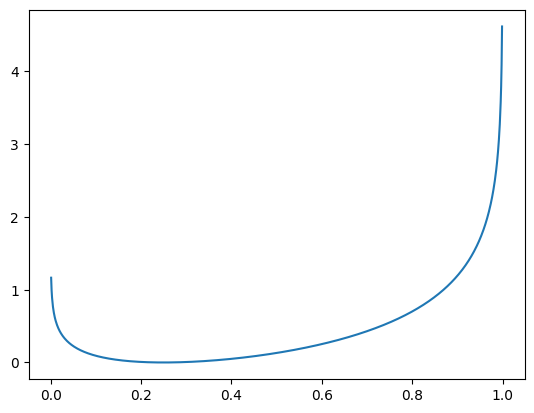

In [7]:

plt.plot(xcoord,ycoord)
plt.show()

In [15]:
# Check the KLDivLoss function from torch.nn
xcoord_torch = torch.tensor(xcoord)
rho_torch = torch.ones(xcoord_torch.shape) * rho

/tmp/ipykernel_35099/4093990115.py:2: RuntimeWarning: divide by zero encountered in log
  xcoord_torch = torch.tensor(np.log(xcoord))


In [16]:
ycoord_torch = (nn.functional.kl_div(xcoord_torch.log(), rho_torch, reduction="none", log_target=False) + nn.functional.kl_div((1 - xcoord_torch).log(), 1 - rho_torch, reduction="none", log_target=False))

In [17]:
xcoord_torch = xcoord_torch.detach().numpy()
ycoord_torch = ycoord_torch.detach().numpy()

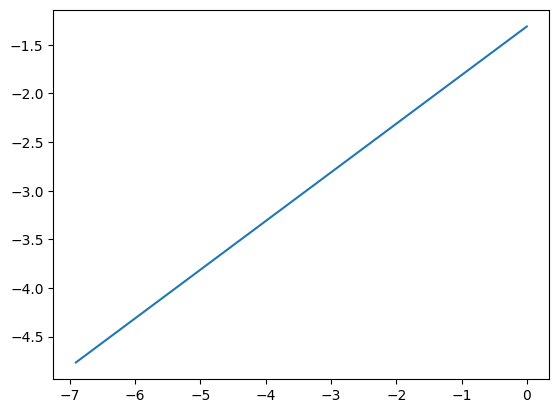

In [18]:

plt.plot(xcoord_torch, ycoord_torch)
plt.show()